# Visualization
Key Visuals:
- Overview Map
- Animation

## Import Shapefile

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.gridspec as gridspec

shapefile_path = "data/spatial/geo_export_86dc231e-3ba9-473c-a7a5-0e89f969d1f6.shp"
gdf = gpd.read_file(shapefile_path)

# convert to 2790
gdf = gdf.to_crs('EPSG:2790')

# compute new square foot areas
gdf['area_2790'] = gdf['geometry'].area

# drop old spatial columns
gdf = gdf.drop(columns = ["shape_area", "shape_len"])

df = pd.read_csv('./data/results/processed/semi_hourly_28th.csv')

## Overview Map

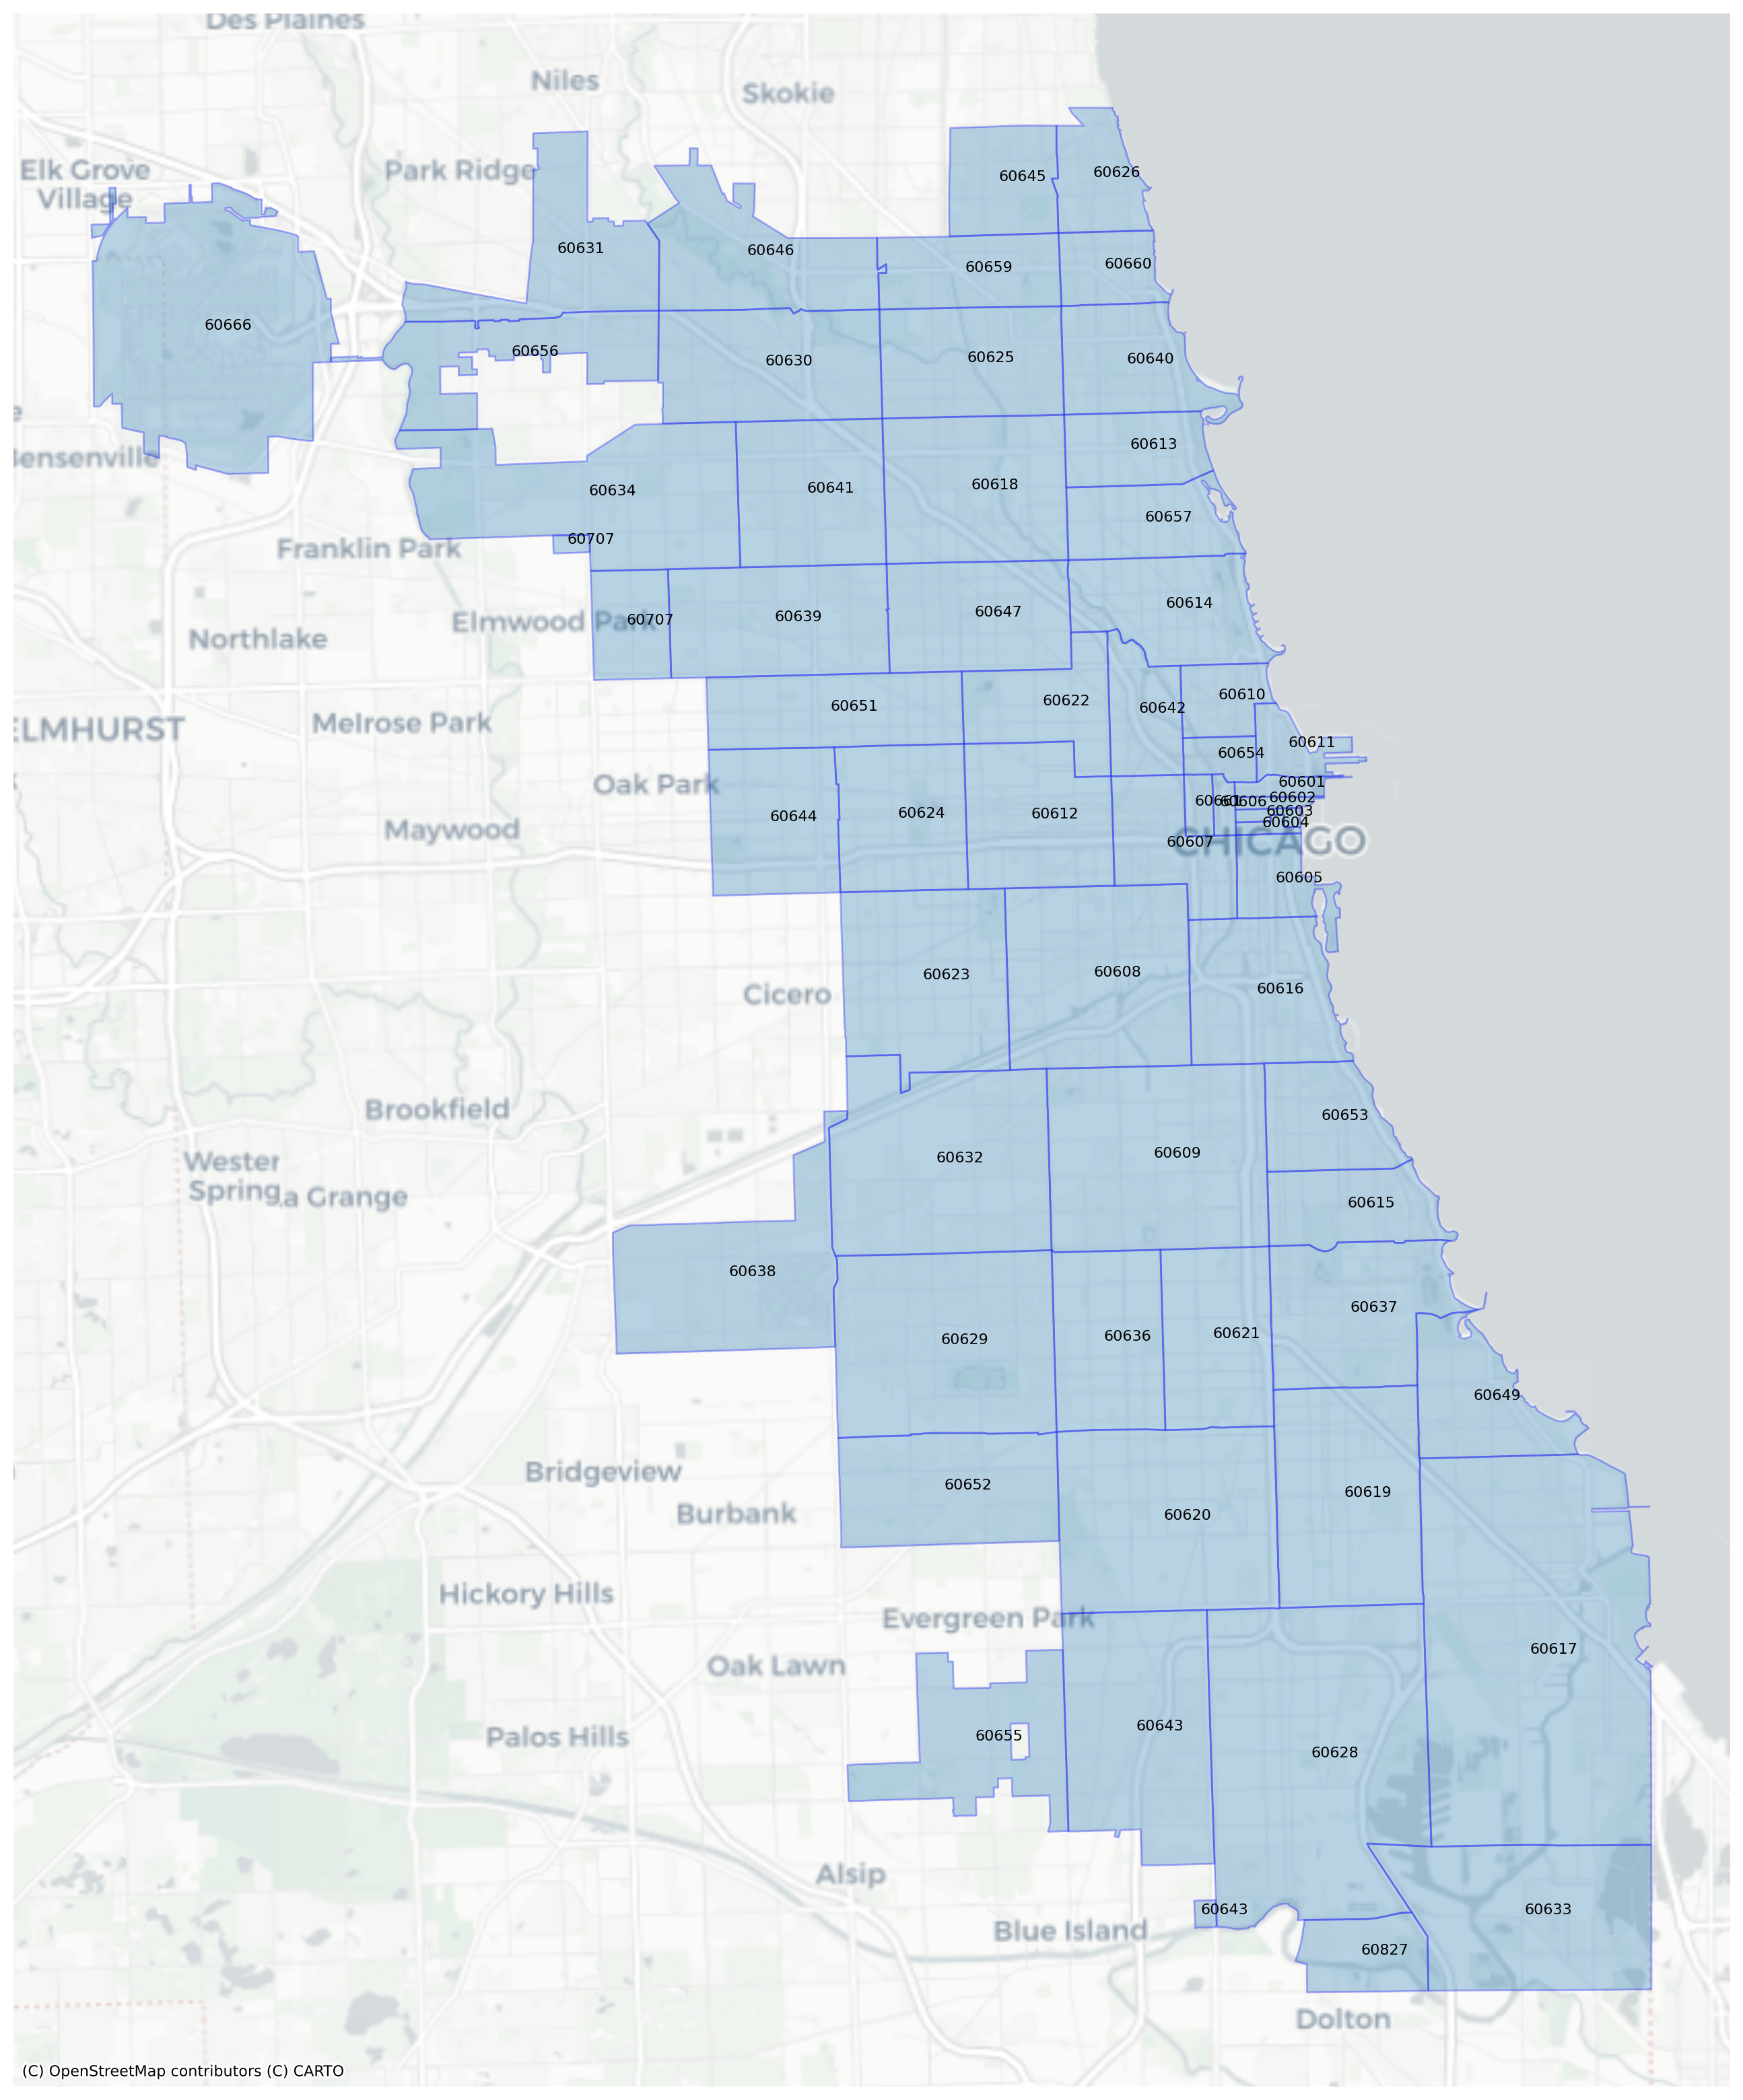

In [4]:
fig, ax = plt.subplots(figsize = (20,20), dpi = 200)


gdf.plot(ax = ax, alpha=0.3, edgecolor='b')

# show zipcodes
for idx, row in gdf.iterrows():
    plt.text(row.geometry.centroid.x-100, row.geometry.centroid.y, row['zip'], fontsize=8)

# add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.axis('off')

plt.show()

## Animation
### Base Image

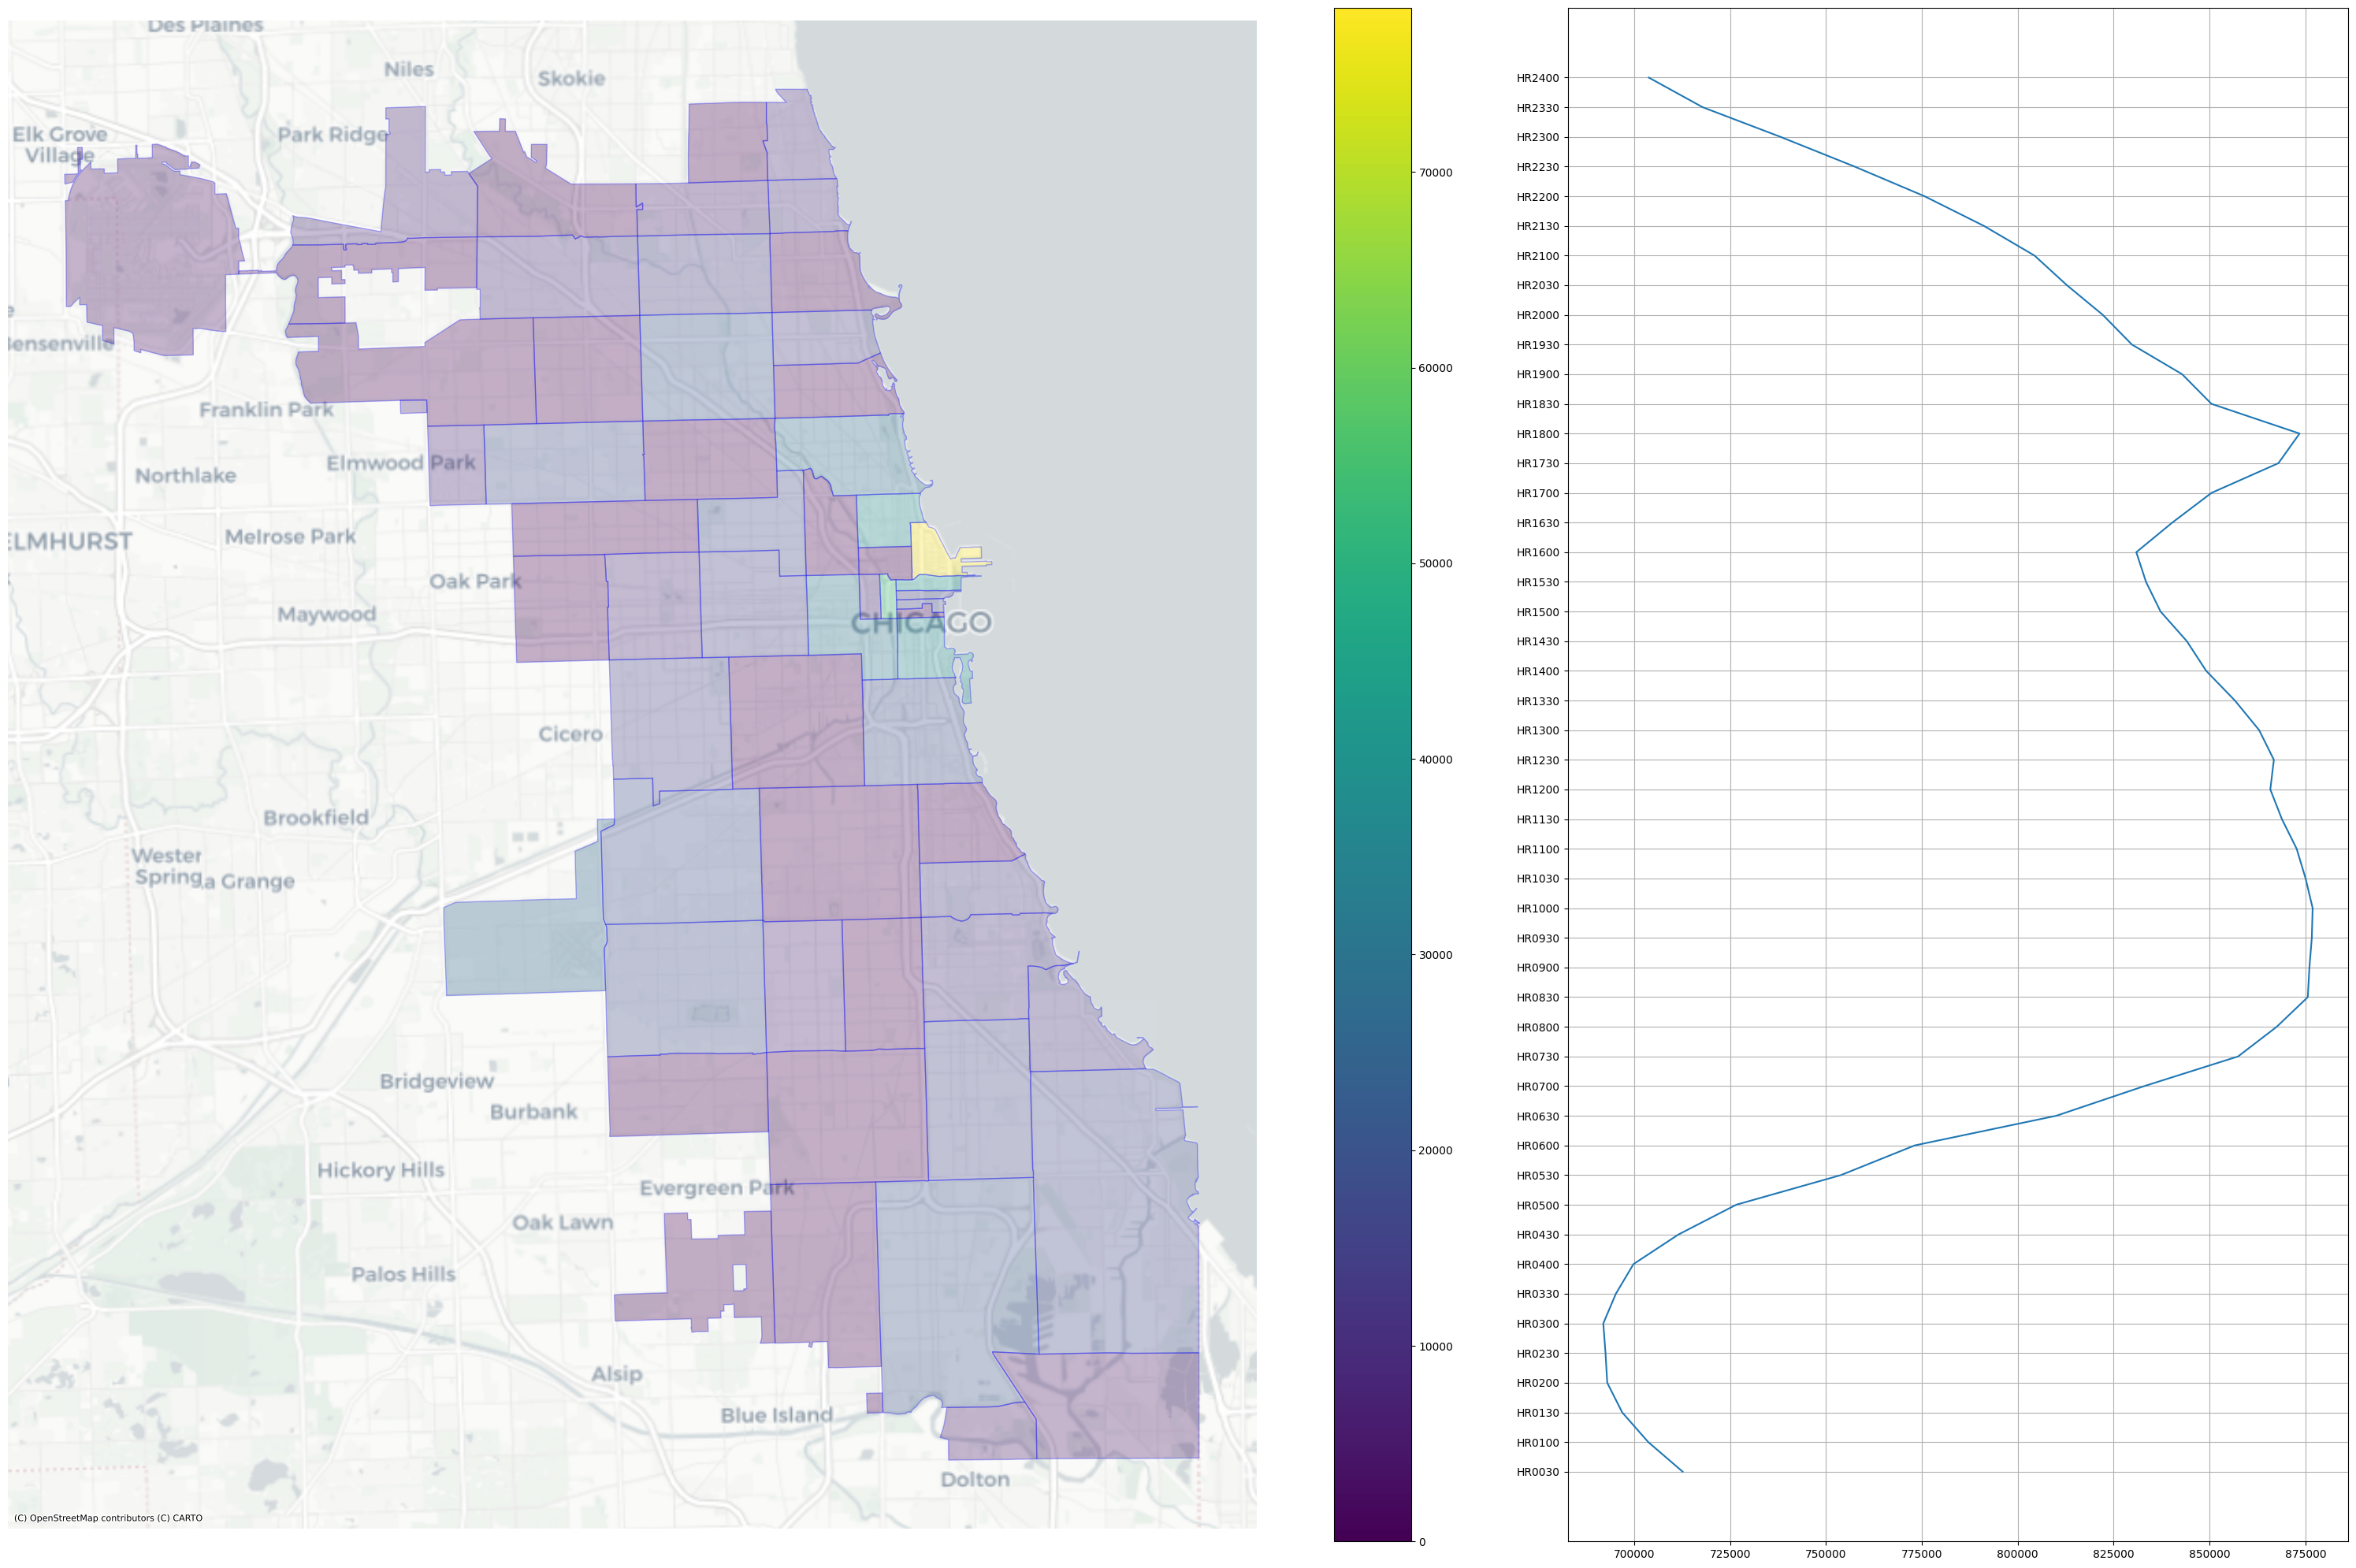

In [51]:
# Existing code for hr_sum and subplot creation
hr_columns = [col for col in df.columns if col.startswith('HR')]
hr_sum = df[hr_columns].sum()

# Create a subplot grid with 1 row and 2 columns
fig = plt.figure(figsize=(30, 20))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])  # Set width ratio 2:1 for the subplots

# Define subplots within the grid
ax_map = plt.subplot(gs[0])
ax_right = plt.subplot(gs[1])

# merge on gdf
df['ZIP_CODE'] = df['ZIP_CODE'].astype(str)
gdf_time_series = gdf.merge(df, left_on='zip', right_on='ZIP_CODE', how='left').fillna(0)

# Plot the map on the first subplot (ax_map)
gdf_time_series.plot(
    ax=ax_map,
    alpha=0.3,
    edgecolor='b',
    column = "HR0030",
    legend = True
)

ctx.add_basemap(ax_map, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax_map.axis('off')
#ax_map.legend(title="Legend Title", loc='lower left', bbox_to_anchor=(1, 0.5))


# Plot hr_sum with x and y axes swapped on the second subplot (ax_right)
ax_right.plot(hr_sum.values, hr_sum.index)
ax_right.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [55]:
list(gdf_time_series.columns)[9:][0]

'HR0030'

In [39]:
gdf_time_series

objectid    zip                                           geometry  \
0       33.0  60647  POLYGON ((354395.365 583175.066, 354396.925 58...   
1       34.0  60639  POLYGON ((350309.184 583687.984, 350301.131 58...   
2       35.0  60707  POLYGON ((345493.616 582156.233, 345468.119 58...   
3       36.0  60622  POLYGON ((355295.719 579971.249, 355295.718 57...   
4       37.0  60651  POLYGON ((352013.074 580690.890, 351999.446 58...   
..       ...    ...                                                ...   
56      57.0  60623  POLYGON ((353043.352 573425.502, 353038.012 57...   
57      58.0  60629  POLYGON ((354078.689 565412.021, 354078.875 56...   
58      59.0  60620  POLYGON ((359045.914 561431.658, 359033.256 56...   
59      60.0  60637  POLYGON ((362869.622 569620.996, 362862.559 56...   
60      61.0  60619  POLYGON ((362163.368 564771.766, 362163.402 56...   

       area_2790  Unnamed: 0 ZIP_CODE  month   day  total_energy  \
0   9.852616e+06         0.0        0    0.0   0.0  0.000000e+00   
1   1.184296e+07       449.0    60639    1.0  28.0  1.001756e+06   
2   4.187066e+06        38.0    60707    1.0  28.0  4.614861e+05   
3   6.582561e+06       573.0    60622    1.0  28.0  9.889208e+05   
4   9.201116e+06         0.0        0    0.0   0.0  0.000000e+00   
..           ...         ...      ...    ...   ...           ...   
56  1.442655e+07       990.0    60623    1.0  28.0  7.856586e+05   
57  1.961328e+07       588.0    60629    1.0  28.0  9.106035e+05   
58  1.966728e+07         0.0        0    0.0   0.0  0.000000e+00   
59  1.165234e+07       999.0    60637    1.0  28.0  5.550224e+05   
60  1.559588e+07       819.0    60619    1.0  28.0  7.774996e+05   

          HR0030  ...        HR1930        HR2000        HR2030        HR2100  \
0       0.000000  ...      0.000000      0.000000      0.000000      0.000000   
1   17923.928050  ...  22396.135813  22150.786413  21915.203253  21654.653953   
2    8432.698197  ...  11257.787973  11137.821773  10988.123267  10784.462967   
3   17293.624033  ...  23254.593406  22943.911406  22705.331268  22373.912468   
4       0.000000  ...      0.000000      0.000000      0.000000      0.000000   
..           ...  ...           ...           ...           ...           ...   
56  14836.157208  ...  17718.624211  17653.926211  17501.113952  17272.208352   
57  17970.638904  ...  21497.902077  21526.979077  21411.271650  21216.843350   
58      0.000000  ...      0.000000      0.000000      0.000000      0.000000   
59  11090.987324  ...  12636.492164  12565.751664  12500.107383  12467.562083   
60  15340.044849  ...  17533.455268  17390.823268  17338.282960  17139.710560   

          HR2130        HR2200        HR2230        HR2300        HR2330  \
0       0.000000      0.000000      0.000000      0.000000      0.000000   
1   21173.663681  20622.610381  19996.219185  19396.151285  18778.655828   
2   10463.786395  10167.746395   9799.696222   9336.894522   8879.806796   
3   21908.012001  21219.277501  20223.492346  19341.790946  18294.619973   
4       0.000000      0.000000      0.000000      0.000000      0.000000   
..           ...           ...           ...           ...           ...   
56  17051.847493  16749.983493  16371.303368  15823.232368  15397.648797   
57  20923.187582  20510.537982  20002.502216  19306.142316  18629.878417   
58      0.000000      0.000000      0.000000      0.000000      0.000000   
59  12320.039049  12114.017249  11899.789667  11623.810767  11317.229385   
60  16854.733081  16581.701581  16232.008067  15880.358467  15451.871024   

          HR2400  
0       0.000000  
1   18191.933128  
2    8570.086396  
3   17627.750073  
4       0.000000  
..           ...  
56  15129.300797  
57  18159.852817  
58      0.000000  
59  11096.182385  
60  15213.455924  

[61 rows x 57 columns]